### Import of necessary libraries for the analysis

In [69]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as date

In [70]:
df_weekly = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy_Projects/Mod5-Project-LinkNYC-Engagement-Analysis/data/raw/LinkNYC_Weekly_Usage__Updated__20251008.csv')

In [71]:
df_weekly.head()

,Report Ending (weekly starting on Sundays),Number of Sessions,Average Session Length,Number of Unique Clients,TB Downloaded,TB Uploaded,Cumulative Bandwidth Utilization To Date (TB),Cumulative Sessions To Date,Cumulative Subscribers To Date
0,01/05/2020,23086410,00:04:07,683250,121.01,12.67,14353.83,2251215052,8461839
1,01/12/2020,23584159,00:04:07,640118,116.52,11.14,14501.59,2284581863,8502485
2,01/19/2020,22004022,00:04:07,592715,114.50,10.52,14626.62,2306585885,8536567
3,01/26/2020,20245042,00:04:15,602685,118.05,10.13,14754.79,2326830927,8571523
4,02/02/2020,22356460,00:04:11,617337,120.69,10.94,14886.42,2349187387,8615640


In [72]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Report Ending (weekly starting on Sundays)     300 non-null    object 
 1   Number of Sessions                             300 non-null    int64  
 2   Average Session Length                         300 non-null    object 
 3   Number of Unique Clients                       300 non-null    int64  
 4   TB Downloaded                                  300 non-null    float64
 5   TB Uploaded                                    300 non-null    float64
 6   Cumulative Bandwidth Utilization To Date (TB)  300 non-null    float64
 7   Cumulative Sessions To Date                    300 non-null    int64  
 8   Cumulative Subscribers To Date                 300 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 21.2+ 

In [73]:
df_weekly.shape

(300, 9)

The dataset contains 300 rows and 9 columns

Now let's normalize the data
- change the column name format to make easier to select each column. 

In [74]:
columns_name = ['report_ending_weekly_starting','number_of_sessions',
                 'average_session_length', 'number_of_unique_clients',
                'tb_downloaded', 'tb_uploaded', 'cumulative_bandwidth',
                'cumulative_sessions', 'cumulative_subscribers']

In [75]:
df_weekly.columns = columns_name

In [76]:
df_weekly.head()

,report_ending_weekly_starting,number_of_sessions,average_session_length,number_of_unique_clients,tb_downloaded,tb_uploaded,cumulative_bandwidth,cumulative_sessions,cumulative_subscribers
0,01/05/2020,23086410,00:04:07,683250,121.01,12.67,14353.83,2251215052,8461839
1,01/12/2020,23584159,00:04:07,640118,116.52,11.14,14501.59,2284581863,8502485
2,01/19/2020,22004022,00:04:07,592715,114.50,10.52,14626.62,2306585885,8536567
3,01/26/2020,20245042,00:04:15,602685,118.05,10.13,14754.79,2326830927,8571523
4,02/02/2020,22356460,00:04:11,617337,120.69,10.94,14886.42,2349187387,8615640


In [77]:
df_weekly['report_ending_weekly_starting'] = pd.to_datetime(df_weekly['report_ending_weekly_starting'], errors='coerce')

In [78]:
df_weekly['cohort'] = df_weekly['report_ending_weekly_starting'].dt.to_period('M')

In [79]:
cohort = df_weekly[df_weekly['cohort'] > '2022-07']

In [80]:
cohort.head()

,report_ending_weekly_starting,number_of_sessions,average_session_length,number_of_unique_clients,tb_downloaded,tb_uploaded,cumulative_bandwidth,cumulative_sessions,cumulative_subscribers,cohort
135,2022-08-07,3668886,00:23:14,208261,106.21,18.23,27244.46,3095068353,11606145,2022-08
136,2022-08-14,3752859,00:23:40,214463,112.34,19.64,27368.90,3098737239,11655953,2022-08
137,2022-08-21,3296456,00:23:14,219238,96.87,15.99,27613.74,3105786554,11763607,2022-08
138,2022-08-28,4047052,00:23:12,226977,116.79,19.69,27750.22,3109833606,11819266,2022-08
139,2022-09-04,4055208,00:23:15,231135,119.57,20.07,27889.86,3113888814,11873405,2022-09


Now let's check for missing data 

<Axes: >

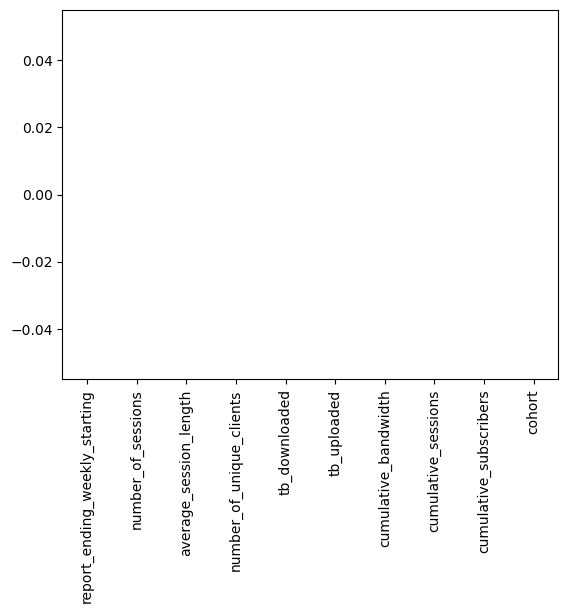

In [81]:
cohort.isna().sum().plot(kind='bar')


In [82]:
cohort.duplicated().sum()


np.int64(0)

Perfect, there are no missing and duplicated value in the dataset. 

Now we are confident that any summary statistique that will result from this date will be accurate, and will not skew our results. 

Next step, quick summary statistique. 

In [83]:
cohort.describe()

,report_ending_weekly_starting,number_of_sessions,number_of_unique_clients,tb_downloaded,tb_uploaded,cumulative_bandwidth,cumulative_sessions,cumulative_subscribers
count,165,1.650000e+02,165.000000,165.000000,165.000000,165.000000,1.650000e+02,1.650000e+02
mean,2024-03-03 00:26:10.909090816,4.469424e+06,259767.666667,136.053818,21.584848,39830.442667,3.457281e+09,1.542918e+07
min,2022-08-07 00:00:00,2.588382e+06,132672.000000,82.980000,13.280000,27244.460000,3.095068e+09,1.160614e+07
25%,2023-05-21 00:00:00,3.802487e+06,229566.000000,118.370000,18.990000,33892.760000,3.288657e+09,1.355120e+07
50%,2024-03-03 00:00:00,4.387957e+06,251609.000000,134.060000,20.730000,40473.230000,3.475821e+09,1.543872e+07
75%,2024-12-15 00:00:00,4.978319e+06,297622.000000,149.410000,23.630000,46734.480000,3.655956e+09,1.730408e+07
max,2025-09-28 00:00:00,7.998999e+06,402345.000000,245.600000,38.410000,52081.130000,3.803278e+09,1.947958e+07
std,NaN,8.361642e+05,39495.760554,26.194428,4.120660,7718.958856,2.216232e+08,2.236936e+06


Let's change `the report ending weekly starting` to datetime

In [84]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 135 to 299
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   report_ending_weekly_starting  165 non-null    datetime64[ns]
 1   number_of_sessions             165 non-null    int64         
 2   average_session_length         165 non-null    object        
 3   number_of_unique_clients       165 non-null    int64         
 4   tb_downloaded                  165 non-null    float64       
 5   tb_uploaded                    165 non-null    float64       
 6   cumulative_bandwidth           165 non-null    float64       
 7   cumulative_sessions            165 non-null    int64         
 8   cumulative_subscribers         165 non-null    int64         
 9   cohort                         165 non-null    period[M]     
dtypes: datetime64[ns](1), float64(3), int64(4), object(1), period[M](1)
memory usage: 14.2+ K

Let's create two new series for sessions per users and GB per session to indicates session intensity

In [85]:
cohort['sessions_per_user'] = cohort['number_of_sessions'] / cohort['number_of_unique_clients']
cohort['GB_per_session'] = ((cohort['tb_downloaded'] + cohort['tb_uploaded']) / cohort['number_of_sessions']) * 1000

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_57904/756953019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['sessions_per_user'] = cohort['number_of_sessions'] / cohort['number_of_unique_clients']
/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_57904/756953019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['GB_per_session'] = ((cohort['tb_downloaded'] + cohort['tb_uploaded']) / cohort['number_of_sessions']) * 1000


In [86]:
cohort.head()

,report_ending_weekly_starting,number_of_sessions,average_session_length,number_of_unique_clients,tb_downloaded,tb_uploaded,cumulative_bandwidth,cumulative_sessions,cumulative_subscribers,cohort,sessions_per_user,GB_per_session
135,2022-08-07,3668886,00:23:14,208261,106.21,18.23,27244.46,3095068353,11606145,2022-08,17.616769,0.033918
136,2022-08-14,3752859,00:23:40,214463,112.34,19.64,27368.90,3098737239,11655953,2022-08,17.498865,0.035168
137,2022-08-21,3296456,00:23:14,219238,96.87,15.99,27613.74,3105786554,11763607,2022-08,15.035970,0.034237
138,2022-08-28,4047052,00:23:12,226977,116.79,19.69,27750.22,3109833606,11819266,2022-08,17.830229,0.033723
139,2022-09-04,4055208,00:23:15,231135,119.57,20.07,27889.86,3113888814,11873405,2022-09,17.544760,0.034435


Now let's identify `Outliers`

Outliers: [7011479, 7303526, 7426039, 7998999]


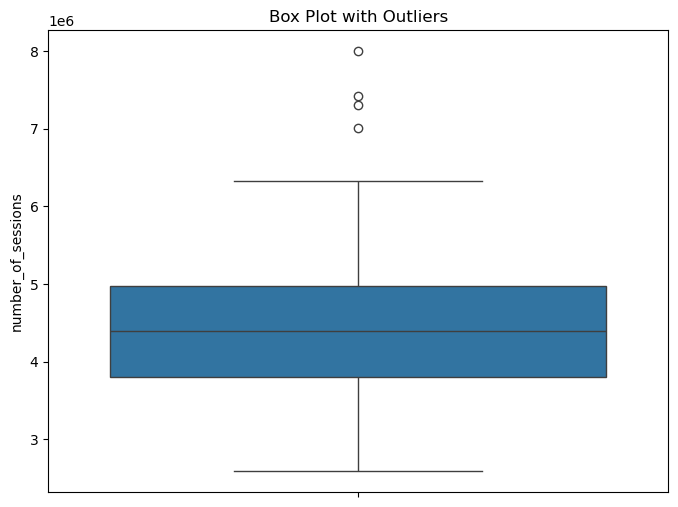

Outliers: [402345]


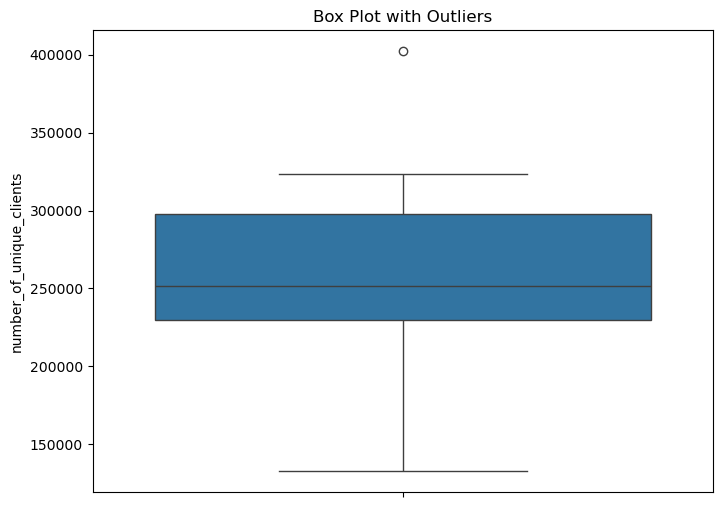

Outliers: [209.27, 245.6, 198.45, 206.64, 213.62, 220.02, 236.58]


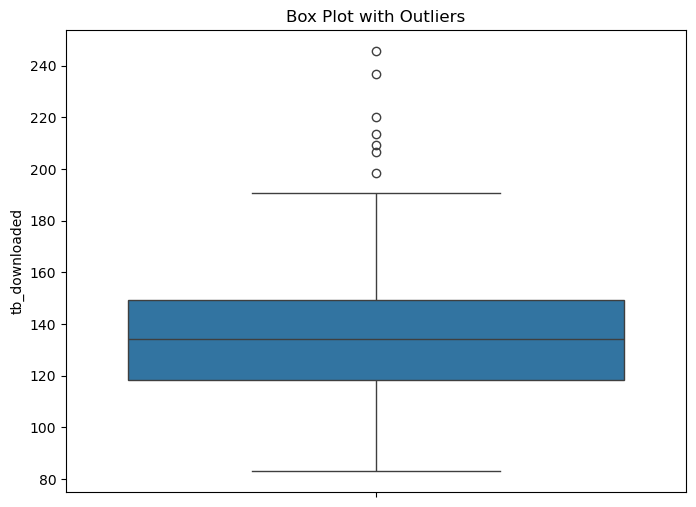

Outliers: []


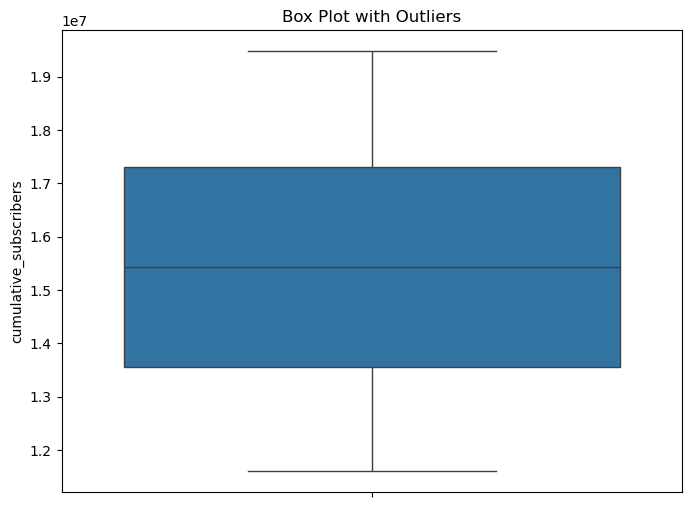

In [87]:
outliers_check = ['number_of_sessions', 'number_of_unique_clients', 'tb_downloaded', 'cumulative_subscribers']
for _ in outliers_check:
    Q1 = np.percentile(cohort[_], 25)
    Q3 = np.percentile(cohort[_], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = [x for x in cohort[_] if x < lower_bound or x > upper_bound]
    print(f"Outliers: {outliers}")

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=cohort[_])
    plt.title("Box Plot with Outliers")
    plt.show()

As we can see in the graphs, there are a lot of outliers in the number of session per week, unique users and the amount of TB downloaded. Before contuning further let's tranform the data to be normally distributed. 

In [88]:
cohort['log_number_of_sessions'] = np.log(cohort['number_of_sessions'])
cohort['log_number_of_unique_clients'] = np.log(cohort['number_of_unique_clients'])
cohort['log_tb_downloaded'] = np.log(cohort['tb_downloaded'])

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_57904/2672680916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['log_number_of_sessions'] = np.log(cohort['number_of_sessions'])
/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_57904/2672680916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['log_number_of_unique_clients'] = np.log(cohort['number_of_unique_clients'])
/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_57904/2672680916.py:3: SettingWithCopyWar

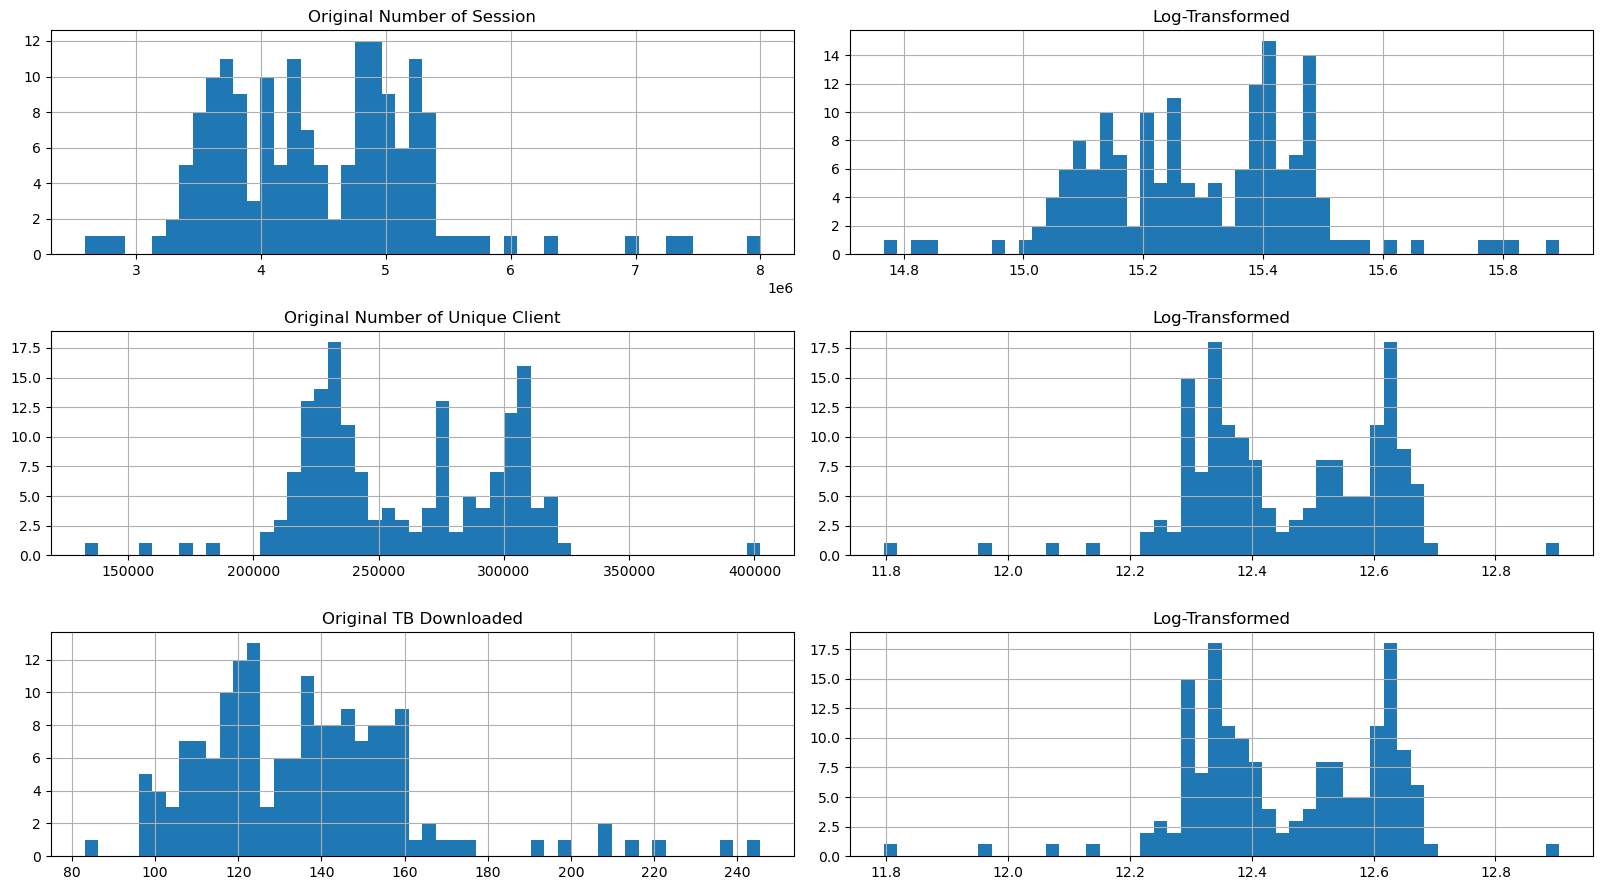

In [89]:
plt.figure(figsize=(16,9))

plt.subplot(3, 2, 1)
cohort['number_of_sessions'].hist(bins=50)
plt.title("Original Number of Session")

plt.subplot(3, 2, 2)
cohort['log_number_of_sessions'].hist(bins=50)
plt.title("Log-Transformed")

plt.subplot(3, 2, 3)
cohort['number_of_unique_clients'].hist(bins=50)
plt.title("Original Number of Unique Client")

plt.subplot(3, 2, 4)
cohort['log_number_of_unique_clients'].hist(bins=50)
plt.title("Log-Transformed")

plt.subplot(3, 2, 5)
cohort['tb_downloaded'].hist(bins=50)
plt.title("Original TB Downloaded")

plt.subplot(3, 2, 6)
cohort['log_number_of_unique_clients'].hist(bins=50)
plt.title("Log-Transformed")

plt.tight_layout()
plt.show()

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_57904/2541390615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['month'] = cohort['report_ending_weekly_starting'].dt.month
/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_57904/2541390615.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=[str(m) for m in weeks])


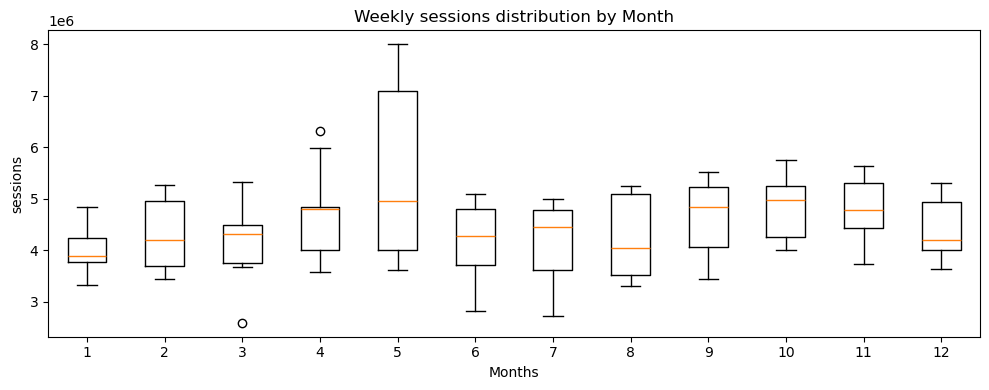

In [90]:
if not cohort.empty:
    cohort['month'] = cohort['report_ending_weekly_starting'].dt.month
    monthly = cohort.groupby('month').agg(users_median=('number_of_unique_clients','median'), sessions_median=('number_of_sessions','median'), gb_median=('cumulative_bandwidth','median')).reset_index()
    # boxplot of sessions by week
    weeks = sorted(cohort['month'].unique())
    data_for_box = [cohort[cohort['month']==m]['number_of_sessions'].dropna() for m in weeks]
    if any(len(x)>0 for x in data_for_box):
        plt.figure(figsize=(10,4))
        plt.boxplot(data_for_box, labels=[str(m) for m in weeks])
        plt.title("Weekly sessions distribution by Month")
        plt.xlabel("Months"); plt.ylabel("sessions"); plt.tight_layout(); plt.show()

In [91]:
df_weekly['cohort'] = df_weekly['report_ending_weekly_starting'].dt.to_period('M')

In [92]:
cohort.head()

,report_ending_weekly_starting,number_of_sessions,average_session_length,number_of_unique_clients,tb_downloaded,tb_uploaded,cumulative_bandwidth,cumulative_sessions,cumulative_subscribers,cohort,sessions_per_user,GB_per_session,log_number_of_sessions,log_number_of_unique_clients,log_tb_downloaded,month
135,2022-08-07,3668886,00:23:14,208261,106.21,18.23,27244.46,3095068353,11606145,2022-08,17.616769,0.033918,15.115399,12.246547,4.665418,8
136,2022-08-14,3752859,00:23:40,214463,112.34,19.64,27368.90,3098737239,11655953,2022-08,17.498865,0.035168,15.138029,12.275893,4.721530,8
137,2022-08-21,3296456,00:23:14,219238,96.87,15.99,27613.74,3105786554,11763607,2022-08,15.035970,0.034237,15.008359,12.297913,4.573370,8
138,2022-08-28,4047052,00:23:12,226977,116.79,19.69,27750.22,3109833606,11819266,2022-08,17.830229,0.033723,15.213499,12.332604,4.760377,8
139,2022-09-04,4055208,00:23:15,231135,119.57,20.07,27889.86,3113888814,11873405,2022-09,17.544760,0.034435,15.215513,12.350757,4.783902,9


In [93]:
cohort.to_csv('../data/clean/LinkNYC_Weekly_Usage_cleaned_2022-current.csv', index=False)

### Summary
1. Normalize the data
    - change the column name format to make easier to select each column.
    - check for missing and duplicated data
2. `Datetime` normalization
    - change the data type to datetime 
    - Check for missing week bins (gaps in the calendar). Missing weeks make rolling/seasonal calculations biased; I detected gaps during EDA
3. created some useful features
    - `sessions_per_user = number_of_sessions / number_of_unique_clients`
    Why: shows frequency of return/connect per person. High values -> repeated interactions (good for repeated ad exposure).
    - `GB_per_session = ((tb_downloaded + tb_uploaded) ÷ number_of_sessions) * 1000`
    Why: indicates session intensity or media consumption; if it's higher → stronger ad viewability potential.
4. Data quality & outlier handling
    - Outliers detected by `IQR` (sessions, users, data)
    - Outliers detected in the `number of session per week`, `unique users` and `cumulative_bandwidth`.
    - Tranformed the data to be normally distributed.  

### What to look for next (Seasonality & patterns)
- Expect weekly/seasonal patterns: summer tourism, holiday shopping, weather extremes, and city events are common drivers. Use weekly boxplots to surface recurring seasonality.
- Inspect and find recurring peaks
### Why these KPIs:
- weekly active users is an essential metric to know the audience size by week.
- Sessions per user measures repeat engagement and potential repeat ad exposures per person. High value indicates a captive audience and justifies how much to invest for each ad campaign.
- GB per session (or average session length) — intensity metric; higher values mean longer or richer interactions (video/audio), which can be marketed to sponsors as deeper engagement.